In This Project we are using Retail sales forecasting 
You can change it 
To forcast weather , Stock
Just sub in the model here 

 <h2> 0. Install And Dependencies  </h2>

In [ ]:
!pip install prophet

In [ ]:
import pandas as pd
from prophet import Prophet

 <h2> 1. Read in Data and Process Dates </h2>
   <h4>  Retail sales forecasting </h4>

In [82]:
xdata='/Users/mohamedamr/Desktop/Projects/Time series project/dataset.csv'
df = pd.read_csv(xdata)
df.tail()

,Time Date,Product,Store,Value
1075,12122020,2667437,QLD_CW_ST0203,3167.594500
1076,13122020,2667437,QLD_CW_ST0203,3167.594500
1077,14122020,2667437,QLD_CW_ST0203,3383.354511
1078,15122020,2667437,QLD_CW_ST0203,2714.591329
1079,16122020,2667437,QLD_CW_ST0203,2585.035107


In [83]:
df['Year'] = df['Time Date'].apply(lambda x: str(x)[-4:])
df['Month'] = df['Time Date'].apply(lambda x: str(x)[-6:-4])
df['Day'] = df['Time Date'].apply(lambda x: str(x)[:-6])
df['ds'] = pd.DatetimeIndex(df['Year']+'-'+df['Month']+'-'+df['Day'])
df = df.loc[(df['Product']==2667437) & (df['Store']=='QLD_CW_ST0203')]
df.drop(['Time Date', 'Product', 'Store', 'Year', 'Month', 'Day'], axis=1, inplace=True)
df.columns = ['y', 'ds']

In [84]:
df.tail()
# We have the ds date and the Values

,y,ds
1075,3167.594500,2020-12-12
1076,3167.594500,2020-12-13
1077,3383.354511,2020-12-14
1078,2714.591329,2020-12-15
1079,2585.035107,2020-12-16


In [74]:
df.dtypes

y            float64
ds    datetime64[ns]
dtype: object

 <h3> 2. Train Model </h3>

In [85]:
# One good things about Prophet is the Fast training 
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df)
#Confidence interval =0.95

22:19:39 - cmdstanpy - INFO - Chain [1] start processing
22:19:39 - cmdstanpy - INFO - Chain [1] done processing


 <h3> 3. ForeCast Away</h3>

In [88]:
future = m.make_future_dataframe(periods=100,freq='D')
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1175,2021-03-22,4235.667647,2033.877467,5269.665654,4232.253155,4238.807134,-514.572606,-514.572606,-514.572606,468.569986,468.569986,468.569986,16.627334,16.627334,16.627334,-999.769926,-999.769926,-999.769926,0.0,0.0,0.0,3721.095041
1176,2021-03-23,4236.736783,2045.356162,5390.168148,4233.272580,4239.912100,-532.014616,-532.014616,-532.014616,468.569986,468.569986,468.569986,-11.269989,-11.269989,-11.269989,-989.314613,-989.314613,-989.314613,0.0,0.0,0.0,3704.722168
1177,2021-03-24,4237.805919,2105.653253,5269.979860,4234.263199,4241.041686,-517.459770,-517.459770,-517.459770,468.569986,468.569986,468.569986,-4.392342,-4.392342,-4.392342,-981.637414,-981.637414,-981.637414,0.0,0.0,0.0,3720.346149
1178,2021-03-25,4238.875055,2168.899529,5356.554356,4235.253817,4242.165017,-486.286042,-486.286042,-486.286042,468.569986,468.569986,468.569986,22.465599,22.465599,22.465599,-977.321628,-977.321628,-977.321628,0.0,0.0,0.0,3752.589013
1179,2021-03-26,4239.944191,2156.135681,5349.601845,4236.255992,4243.273471,-542.883552,-542.883552,-542.883552,468.569986,468.569986,468.569986,-34.587957,-34.587957,-34.587957,-976.865581,-976.865581,-976.865581,0.0,0.0,0.0,3697.060639


For 2018-01-01, the trend is 3042.01, but the additive terms subtract 

-641.04, resulting in a predicted value of 2400.98.

yhat_lower: The lowest likely value for the prediction.


yhat_upper: The highest likely value for the prediction.

For historical dates, the model doesn't simply copy the actual values. Instead, it tries to recreate the data using the patterns it has learned (trend, seasonality, etc.) from the training set. This is important for the following reasons:

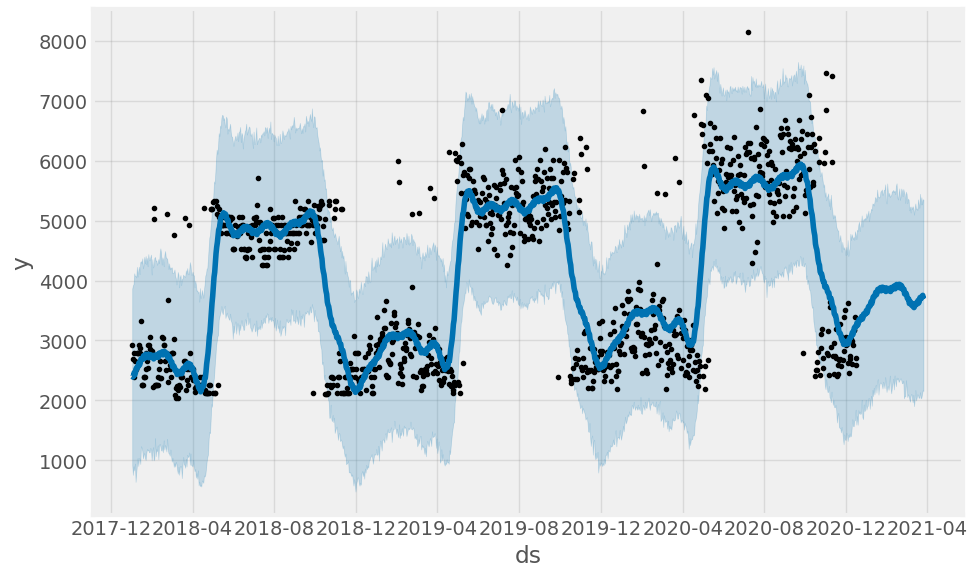

In [89]:
plot1= m.plot(forecast)

Blue line Represent the prediction (Y-hat value)

Black Dot is the Actual values 
The shaded parts represent y_hat lower , y-hat upper

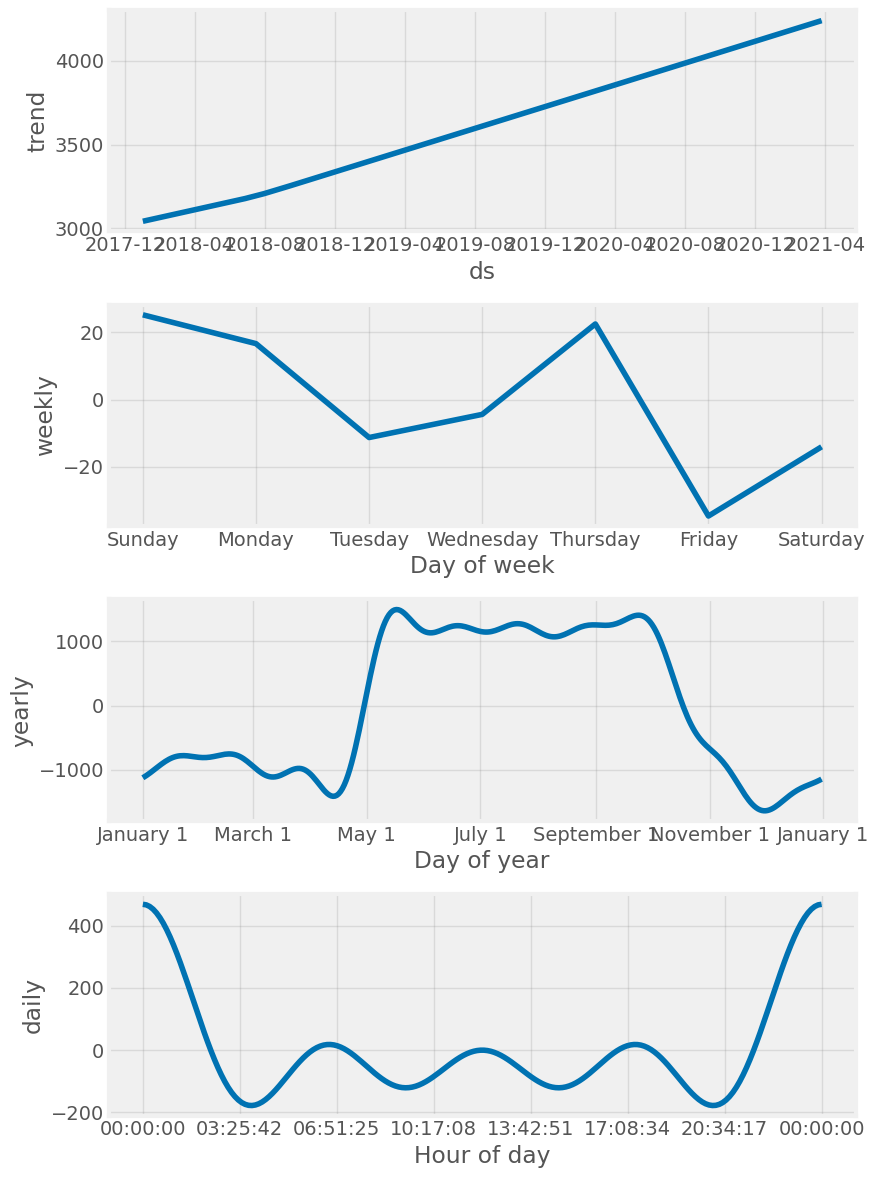

In [90]:

plt2 = m.plot_components(forecast)